In [1]:
import pandas as pd

In [2]:
user_info = pd.read_csv('../data/member_info_0926.txt', header=None, sep='\t')

user_info.columns = ['用户id','性别','访问频率','用户二分类特征a','用户二分类特征b','用户二分类特征c','用户二分类特征d','用户二分类特征e','用户多分类特征a','用户多分类特征b','用户多分类特征c','用户多分类特征d','用户多分类特征e','盐值','关注话题','感兴趣话题']

for col in user_info.columns:
    print(col, len(user_info[col].unique()))

用户id 1931654
性别 3
访问频率 5
用户二分类特征a 2
用户二分类特征b 2
用户二分类特征c 2
用户二分类特征d 2
用户二分类特征e 2
用户多分类特征a 2561
用户多分类特征b 291
用户多分类特征c 428
用户多分类特征d 1556
用户多分类特征e 2
盐值 732
关注话题 1301436
感兴趣话题 1399721


In [3]:
question_info = pd.read_csv('../data/question_info_0926.txt', header=None, sep='\t')
question_info.columns = ['问题id','问题创建时间','问题标题单字编码','问题标题切词编码','问题描述单字编码','问题描述切词编码','问题绑定话题']
for col in question_info.columns:
    print(col, len(question_info[col].unique()))

问题id 1829900
问题创建时间 54617
问题标题单字编码 1828611
问题标题切词编码 1786981
问题描述单字编码 831554
问题描述切词编码 816606
问题绑定话题 1166444


In [4]:
answer_info = pd.read_csv('../data/answer_info_0926.txt', header=None, sep='\t')
answer_info.columns = ['回答ID', '问题ID', '作者ID', '回答创建时间', '回答内容的单字编码序列', '回答内容的切词编码序列',
                      '回答是否被标为优秀回答', '回答是否被推荐', '回答是否被收入圆桌', '回答是否包含图片', '回答是否包含视频',
                      '回答的内容字数', '回答收到的点赞数', '回答收到的取赞数', '回答收到的评论数', '回答收藏数', 
                       '回答收到的感谢数', '回答收到的被举报数', '回答收到的没有帮助数', '回答收到的反对数']

In [5]:
train = pd.read_csv('../data/invite_info_0926.txt', header=None, sep='\t')
train.columns = ['问题id', '用户id', '邀请创建时间','是否回答']
train = pd.merge(train, user_info, how='left', on='用户id')
train = pd.merge(train, question_info, how='left', on='问题id')
print(train.columns)

Index(['问题id', '用户id', '邀请创建时间', '是否回答', '性别', '访问频率', '用户二分类特征a', '用户二分类特征b',
       '用户二分类特征c', '用户二分类特征d', '用户二分类特征e', '用户多分类特征a', '用户多分类特征b', '用户多分类特征c',
       '用户多分类特征d', '用户多分类特征e', '盐值', '关注话题', '感兴趣话题', '问题创建时间', '问题标题单字编码',
       '问题标题切词编码', '问题描述单字编码', '问题描述切词编码', '问题绑定话题'],
      dtype='object')


In [6]:
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

In [7]:
train[['性别', '是否回答']].groupby(['性别']).mean()

,是否回答
性别,
female,0.180768
male,0.183413
unknown,0.171530


/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35775 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38382 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39057 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 35775 missing from current font.
  font.set_text(s, 0, flags=flags)
/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/b

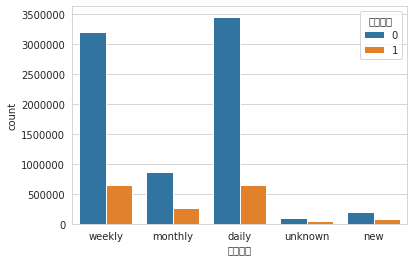

In [8]:
sns.countplot(x='访问频率', hue='是否回答', data=train)

In [9]:
train[['访问频率', '是否回答']].groupby(['访问频率']).mean()

,是否回答
访问频率,
daily,0.159146
monthly,0.228575
new,0.285307
unknown,0.330607
weekly,0.168021


/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib

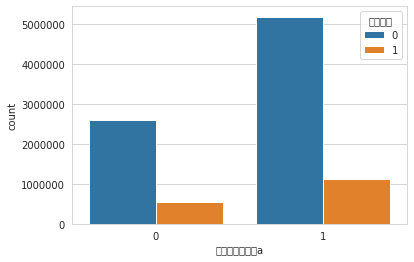

In [10]:
sns.countplot(x='用户二分类特征a',hue='是否回答',data=train)

In [11]:
train[['用户二分类特征a', '是否回答']].groupby(['用户二分类特征a']).mean()

,是否回答
用户二分类特征a,
0,0.175008
1,0.178526


In [12]:
train[['用户二分类特征b', '是否回答']].groupby(['用户二分类特征b']).mean()

,是否回答
用户二分类特征b,
0,0.184141
1,0.161503


In [13]:
train[['用户二分类特征c', '是否回答']].groupby(['用户二分类特征c']).mean()

,是否回答
用户二分类特征c,
0,0.178450
1,0.150445


In [14]:
train[['用户二分类特征d', '是否回答']].groupby(['用户二分类特征d']).mean()

,是否回答
用户二分类特征d,
0,0.178242
1,0.174818


In [15]:
train[['用户二分类特征e', '是否回答']].groupby(['用户二分类特征e']).mean()

,是否回答
用户二分类特征e,
0,0.177707
1,0.172956


In [33]:
train['盐值'].describe()

count    9.489162e+06
mean     4.254204e+02
std      1.136730e+02
min      9.500000e+01
25%      3.340000e+02
50%      3.950000e+02
75%      4.990000e+02
max      8.900000e+02
Name: 盐值, dtype: float64

In [34]:
train['盐值'][train['盐值']<200].count()

1099

In [35]:
train['盐值'][(train['盐值']>200) & (train['盐值']<300)].count()

712112

In [36]:
train['盐值'][train['盐值']>600].count()

922556

In [37]:
train['盐值'][train['盐值']>700].count()

186413

In [38]:
train['盐值'][train['盐值']>800].count()

8780

,是否回答
桶盐值,
1.0,0.169065
2.0,0.040069
3.0,0.178644
4.0,0.194831
5.0,0.212254
6.0,0.194298
7.0,0.172203


/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26742 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30416 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26742 missing from current font.
  font.set_text(s, 0, flags=flags)
/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 30416 missing from current font.
  font.set_text(s, 0, flags=flags)
/root/anaconda3/envs/zhcup/lib/python3.6/site-packages/matplotlib/bac

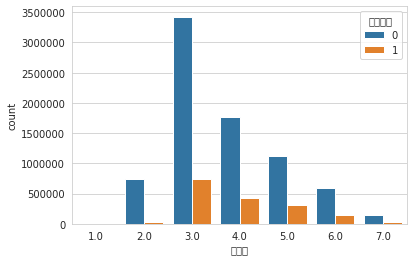

In [39]:
def trans(x):
    if x<=200:
        return 1
    if 200<x<=300:
        return 2
    if 300<x<=400:
        return 3
    if 400<x<=500:
        return 4
    if 500<x<=600:
        return 5
    if 600<x<=700:
        return 6
    if 700<x<=800:
        return 7

train['桶盐值'] = train['盐值'].apply(lambda x:trans(x))
sns.countplot(x='桶盐值', hue='是否回答', data=train)

train[['桶盐值', '是否回答']].groupby(['桶盐值']).mean()

,是否回答
桶盐值2,
2.0,0.040256
3.0,0.178644
4.0,0.194831
5.0,0.212254
6.0,0.194298
7.0,0.172203


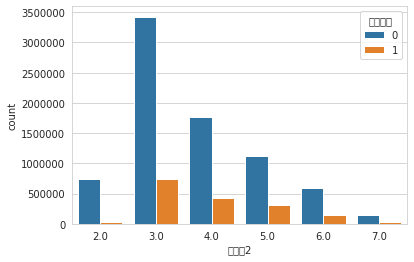

In [40]:
def trans_2(x):
    if x<=300:
        return 2
    if 300<x<=400:
        return 3
    if 400<x<=500:
        return 4
    if 500<x<=600:
        return 5
    if 600<x<=700:
        return 6
    if 700<x<=800:
        return 7

train['桶盐值2'] = train['盐值'].apply(lambda x:trans_2(x))
sns.countplot(x='桶盐值2', hue='是否回答', data=train)

train[['桶盐值2', '是否回答']].groupby(['桶盐值2']).mean()

,是否回答
桶盐值3,
0,0.016049
1,0.048575
2,0.119187
3,0.183048
4,0.203860
5,0.201044
6,0.193342
7,0.198056
8,0.215117


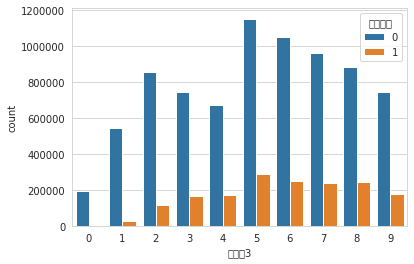

In [41]:
def trans_3(x):
    if x<=280:
        return 0
    if 280<x<=300:
        return 1
    if 300<x<=320:
        return 2
    if 320<x<=340:
        return 3
    if 340<x<=360:
        return 4
    if 360<x<=400:
        return 5
    if 400<x<=450:
        return 6
    if 450<x<=520:
        return 7
    if 520<x<=600:
        return 8
    if 600<x:
        return 9

train['桶盐值3'] = train['盐值'].apply(lambda x:trans_3(x))
sns.countplot(x='桶盐值3', hue='是否回答', data=train)

train[['桶盐值3', '是否回答']].groupby(['桶盐值3']).mean()

,是否回答
桶盐值4,
0,0.016495
1,0.030070
2,0.028810
3,0.050806
4,0.091196
5,0.137912
6,0.170928
7,0.191123
8,0.200224


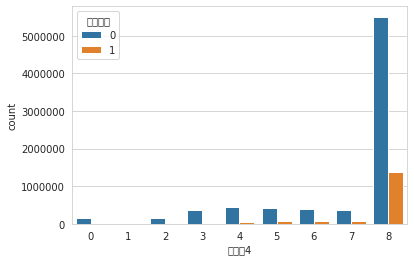

In [42]:
def trans_4(x):
    if x<270:
        return 0
    if x>=340:
        return 8
    return (x - 260)//10

train['桶盐值4'] = train['盐值'].apply(lambda x:trans_4(x))
sns.countplot(x='桶盐值4', hue='是否回答', data=train)

train[['桶盐值4', '是否回答']].groupby(['桶盐值4']).mean()

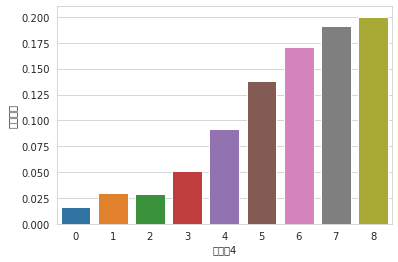

In [43]:
g = train[['桶盐值4', '是否回答']].groupby(['桶盐值4']).mean().reset_index('桶盐值4')

sns.barplot(x='桶盐值4', y='是否回答',data=g)